<a href="https://colab.research.google.com/github/shreyanZnZ/intern_proj_3/blob/main/disease_predic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data = pd.read_csv('/content/diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
584,8,124,76,24,600,28.7,0.687,52,1
663,9,145,80,46,130,37.9,0.637,40,1
637,2,94,76,18,66,31.6,0.649,23,0
122,2,107,74,30,100,33.6,0.404,23,0
87,2,100,68,25,71,38.5,0.324,26,0


In [8]:
data.shape,data.size

((768, 9), 6912)

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

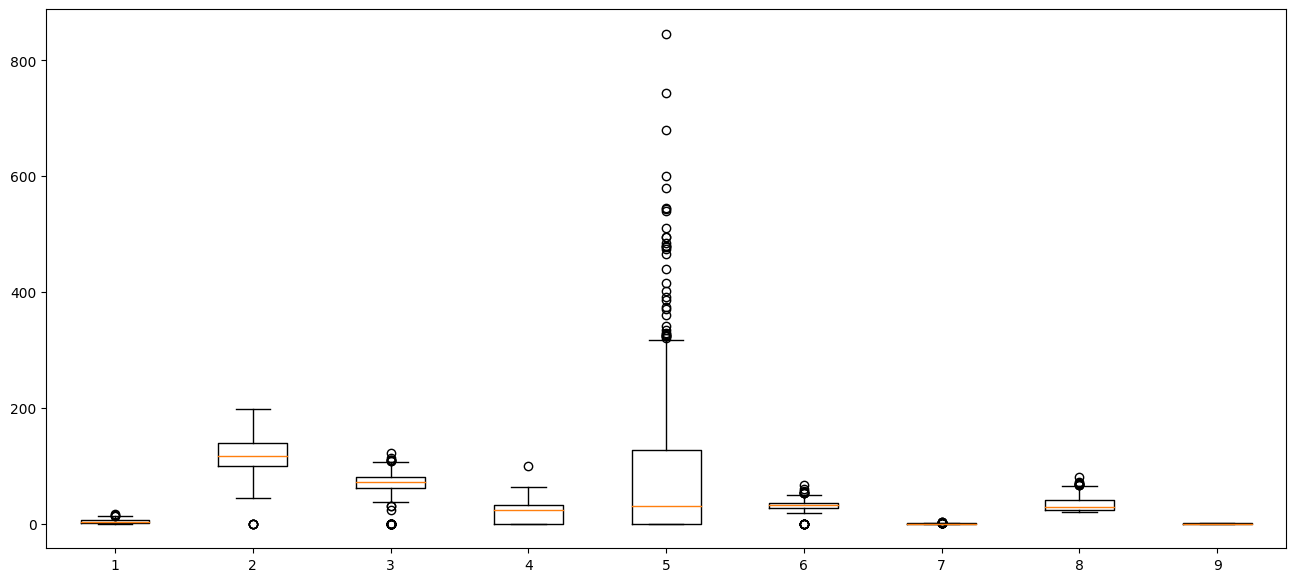

In [12]:
fig,ax=plt.subplots(1,1,figsize=(16,7))
ax.boxplot(data)
plt.show()

In [13]:
data['BMI'].max(),data['BMI'].min(),data['BMI'].mean(),data['BMI'].mode()

(67.1,
 0.0,
 31.992578124999998,
 0    32.0
 Name: BMI, dtype: float64)

In [14]:
Q1 = np.percentile(data['BMI'], 15, interpolation = 'midpoint')

# Third quartile (Q3)
Q3 = np.percentile(data['BMI'], 85, interpolation = 'midpoint')

# Interquaritle range (IQR)
IQR = Q3 - Q1
print("Q1 = ",Q1)
print("Q3 = ",Q3)
print(IQR)

Q1 =  24.85
Q3 =  39.25
14.399999999999999


In [15]:
(data['BMI']>Q3).sum(),(data['BMI']<Q1).sum()

(116, 116)

In [16]:
np.percentile(data['BMI'], 98.5, interpolation = 'midpoint')

49.05

In [17]:
val = data['BMI'].sort_values(ascending=False)

In [18]:
print(val[:8])

177    67.1
445    59.4
673    57.3
125    55.0
120    53.2
303    52.9
247    52.3
193    52.3
Name: BMI, dtype: float64


In [19]:
data = data[(data['BMI']>50)==False]

In [20]:
data.shape

(760, 9)

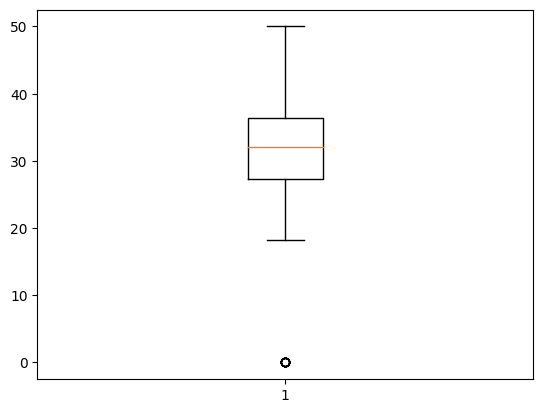

In [21]:
plt.boxplot(data['BMI'])
plt.show()

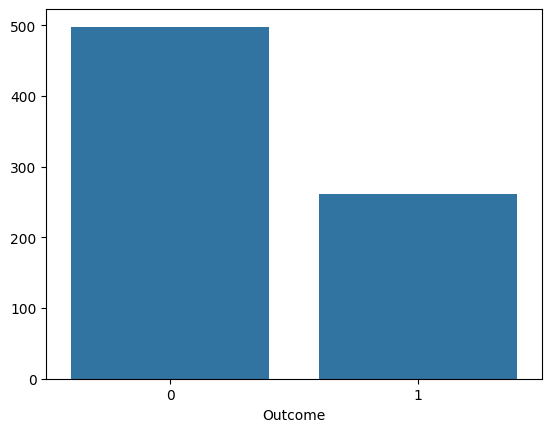

In [23]:
xs = data['Outcome'].value_counts().index
ys = data['Outcome'].value_counts().values

ax = sns.barplot(x=xs, y=ys)
ax.set_xlabel("Outcome")
plt.show()

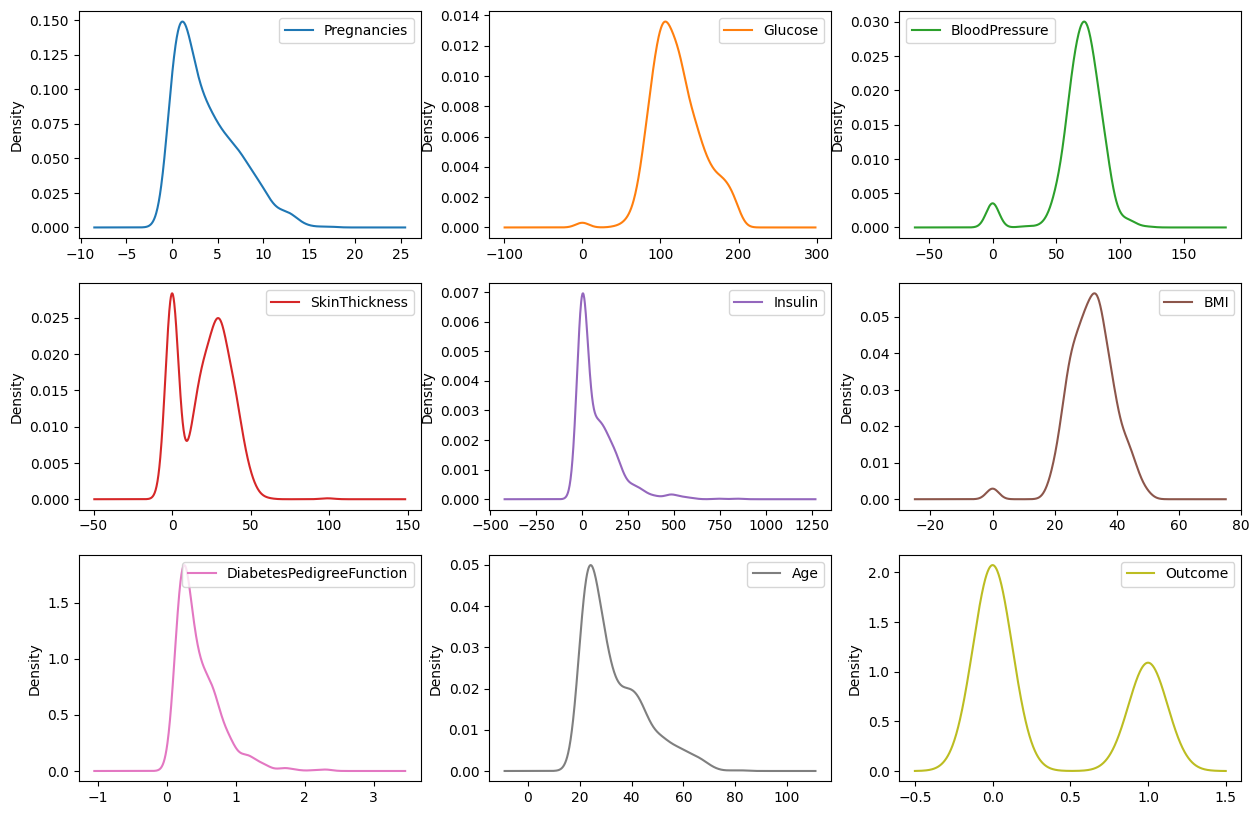

In [24]:
data.plot(kind= 'kde' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,10))
plt.show()

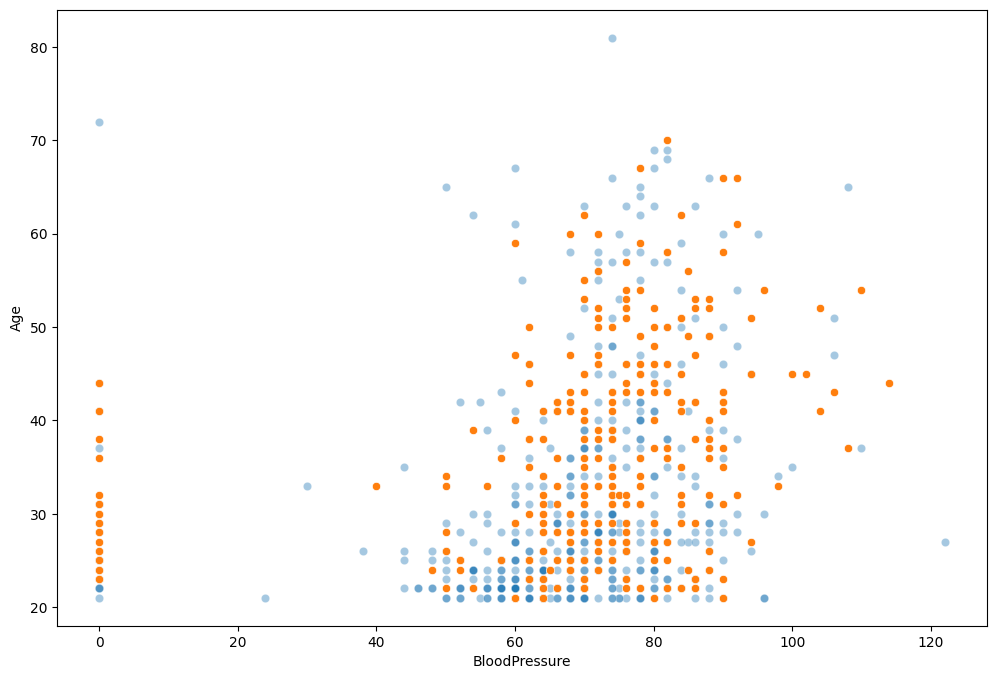

In [25]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x="BloodPressure", y="Age", alpha=0.4, data=data[data['Outcome'] == 0])
sns.scatterplot(x="BloodPressure", y="Age", alpha=1, data=data[data['Outcome'] == 1], ax=ax)
plt.show()

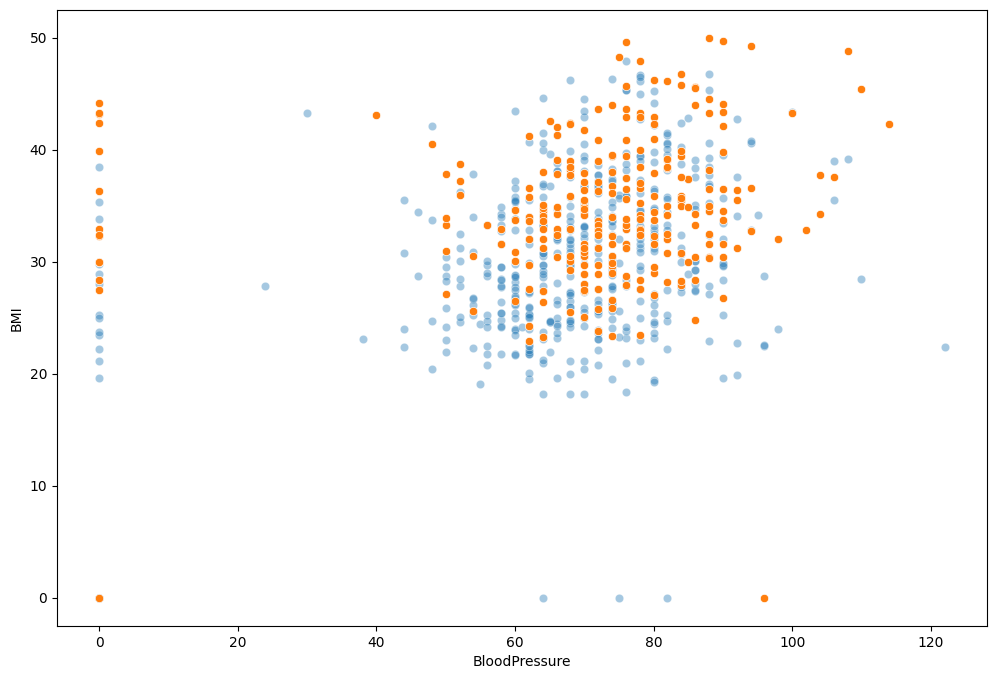

In [26]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(y="BMI", x="BloodPressure", alpha=0.4, data=data[data['Outcome'] == 0])
sns.scatterplot(y="BMI", x="BloodPressure", alpha=1, data=data[data['Outcome'] == 1], ax=ax)
plt.show()

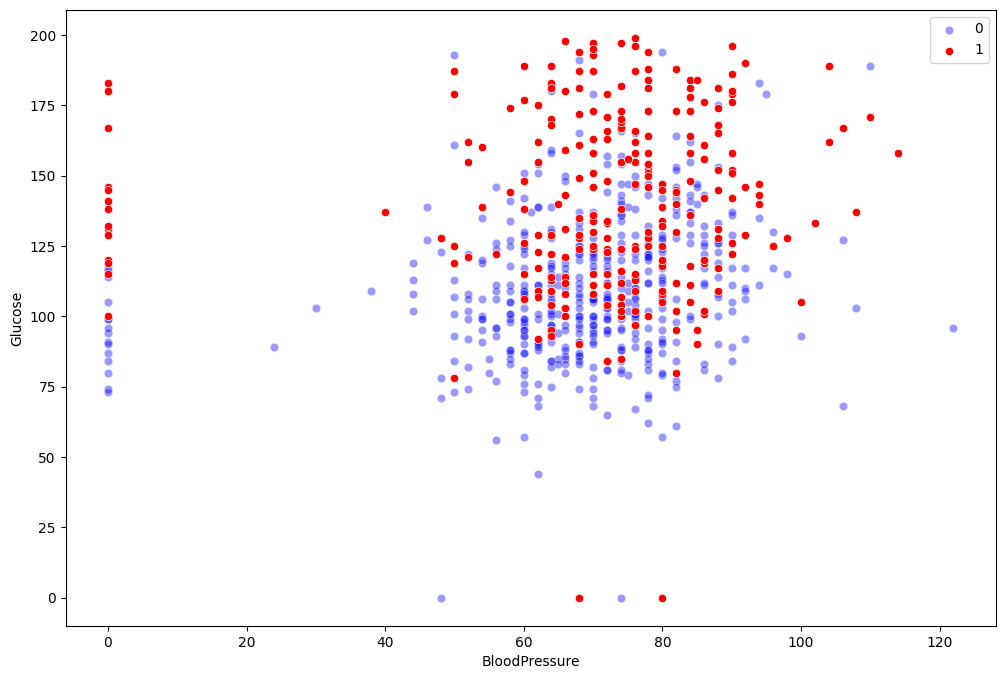

In [27]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(y="Glucose", x="BloodPressure", alpha=0.4, color="blue", label="0", data=data[data['Outcome'] == 0])
sns.scatterplot(x="BloodPressure", y="Glucose", alpha=1, color="red", label="1", data=data[data['Outcome'] == 1], ax=ax)
plt.show()

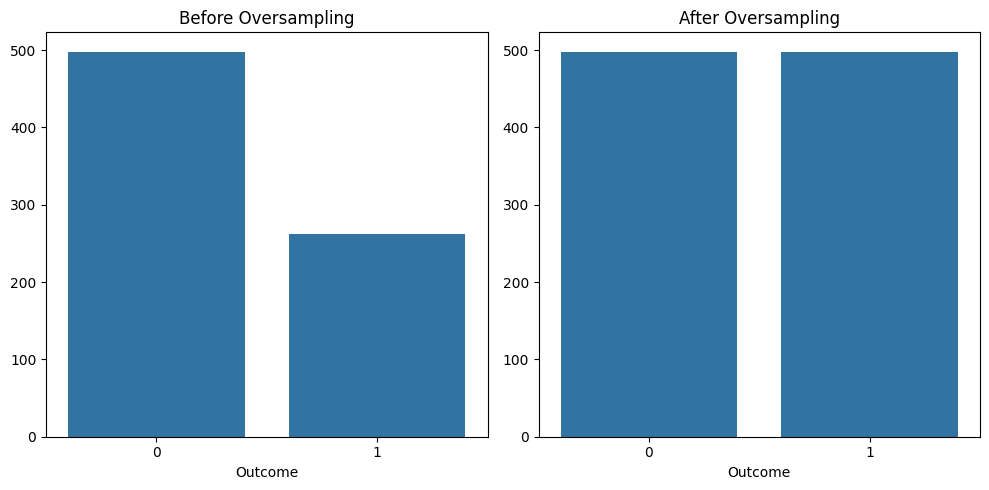

In [28]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']
fig, ax = plt.subplots(1,2 ,figsize = (10,5))

sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax[0])

ax[0].set_title("Before Oversampling")
ax[0].set_xlabel('Outcome')

#Using SMOTE to balance the Data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X, y = sm.fit_resample(X, y)

sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax[1])
ax[1].set_title("After Oversampling")
ax[1].set_xlabel('Outcome')

plt.tight_layout()
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((697, 8), (299, 8), (697,), (299,))

LR: 0.820434 (0.074101)
LDA: 0.811394 (0.071868)
RF: 0.830465 (0.066463)
KNN: 0.828475 (0.067335)
DT: 0.820465 (0.067568)
NB: 0.829535 (0.079711)
SVM: 0.818485 (0.075822)


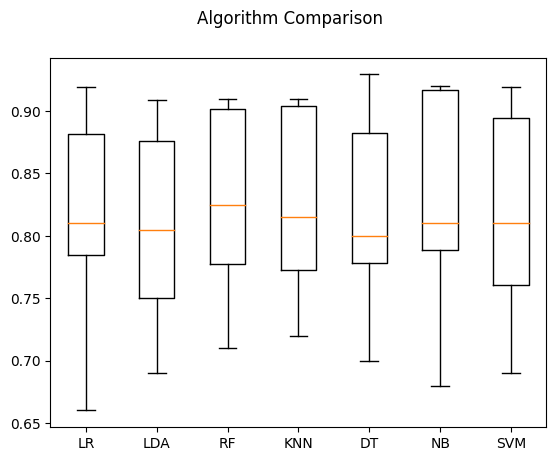

In [30]:
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
    pipeline.fit(X_train, y_train)
    cv_results = model_selection.cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [37]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)

print(f"Accuracy Score : {round(accuracy_score(y_test, prediction) * 100, 2)}%")

Accuracy Score : 80.94%


In [38]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       152
           1       0.78      0.85      0.81       147

    accuracy                           0.81       299
   macro avg       0.81      0.81      0.81       299
weighted avg       0.81      0.81      0.81       299

